使用R语言系统学习一下非参数估计和半参数估计的方法。

实际上包括一些核密度估计的方法，但是不知道放在哪里，就统一放在回归分析里了。

# 核密度估计

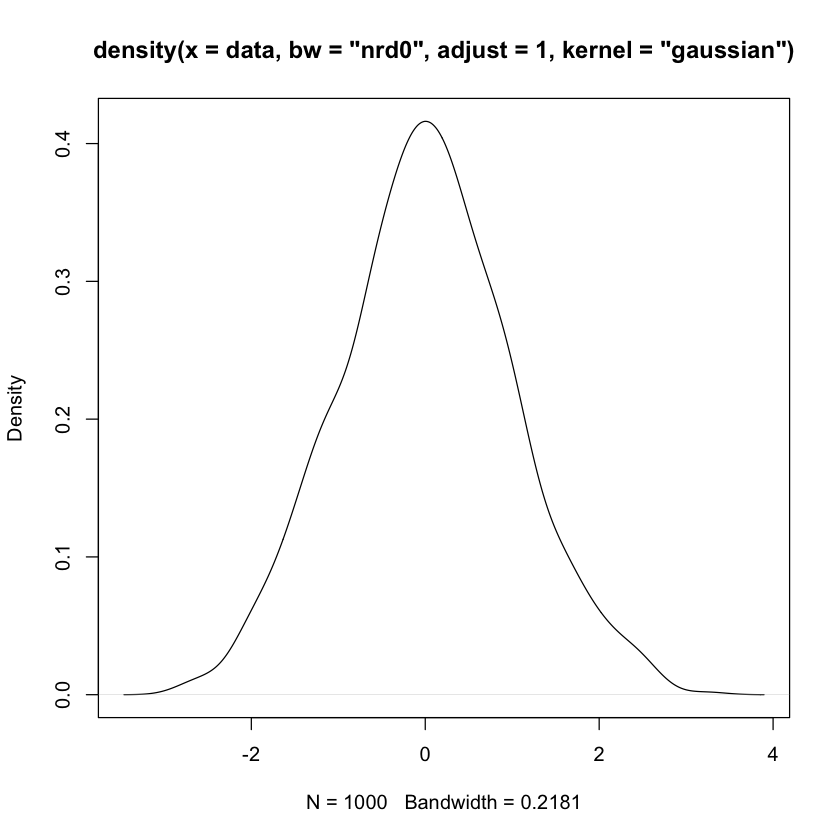

In [2]:
# 生成示例数据
set.seed(123)
data <- rnorm(1000, mean = 0, sd = 1)

# 核密度估计
kde <- density(
  data, 
  kernel = "gaussian",  # 核函数类型（默认高斯核）
  bw = "nrd0",          # 带宽选择方法（默认自动计算）
  adjust = 1)           # 调整带宽倍数（adjust=1表示使用自动计算的带宽）

# 绘制密度曲线
plot(kde)

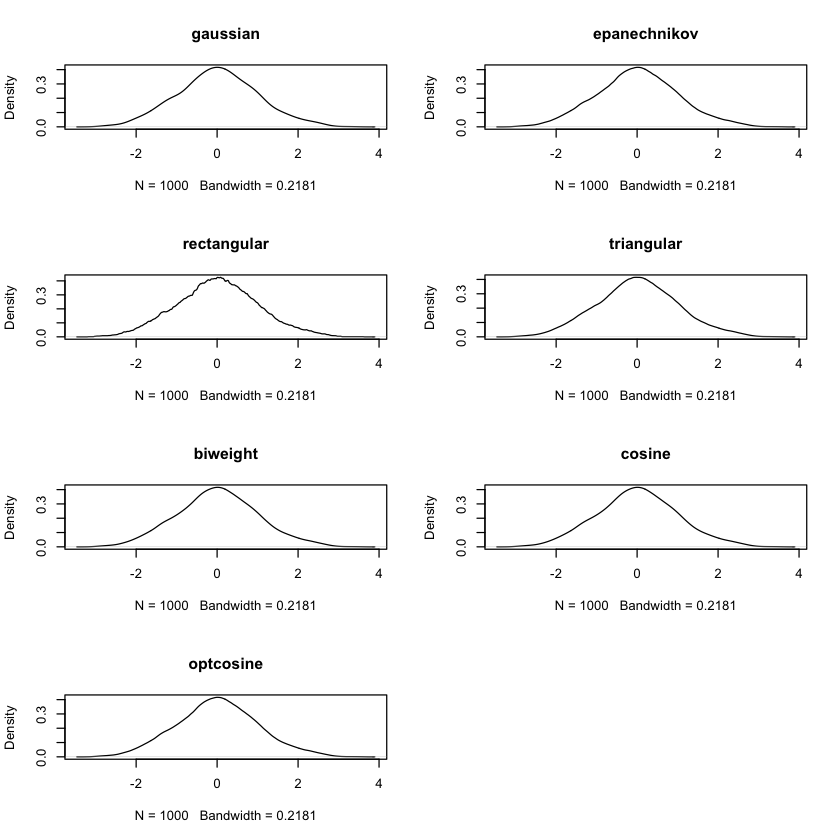

In [4]:
#若干张图比较不同的核函数
kde1 <- density(data, kernel = "gaussian", bw = "nrd0", adjust = 1)
kde2 <- density(data, kernel = "epanechnikov", bw = "nrd0", adjust = 1)
kde3 <- density(data, kernel = "rectangular", bw = "nrd0", adjust = 1)
kde4 <- density(data, kernel = "triangular", bw = "nrd0", adjust = 1)
kde5 <- density(data, kernel = "biweight", bw = "nrd0", adjust = 1)
kde6 <- density(data, kernel = "cosine", bw = "nrd0", adjust = 1)
kde7 <- density(data, kernel = "optcosine", bw = "nrd0", adjust = 1)

par(mfrow = c(4, 2))
plot(kde1, main = "gaussian")
plot(kde2, main = "epanechnikov")
plot(kde3, main = "rectangular")
plot(kde4, main = "triangular")
plot(kde5, main = "biweight")
plot(kde6, main = "cosine")
plot(kde7, main = "optcosine")


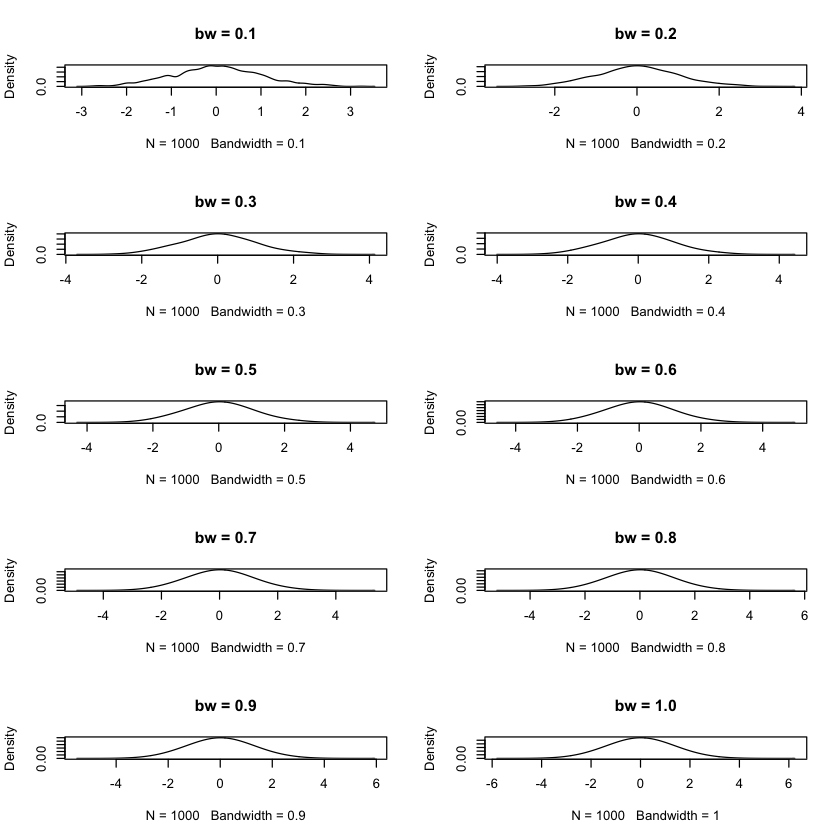

In [5]:
# 手动指定若干个带宽
kde1 <- density(data, kernel = "gaussian", bw = 0.1, adjust = 1)
kde2 <- density(data, kernel = "gaussian", bw = 0.2, adjust = 1)
kde3 <- density(data, kernel = "gaussian", bw = 0.3, adjust = 1)
kde4 <- density(data, kernel = "gaussian", bw = 0.4, adjust = 1)
kde5 <- density(data, kernel = "gaussian", bw = 0.5, adjust = 1)
kde6 <- density(data, kernel = "gaussian", bw = 0.6, adjust = 1)
kde7 <- density(data, kernel = "gaussian", bw = 0.7, adjust = 1)
kde8 <- density(data, kernel = "gaussian", bw = 0.8, adjust = 1)
kde9 <- density(data, kernel = "gaussian", bw = 0.9, adjust = 1)
kde10 <- density(data, kernel = "gaussian", bw = 1.0, adjust = 1)

par(mfrow = c(5, 2))
plot(kde1, main = "bw = 0.1")
plot(kde2, main = "bw = 0.2")
plot(kde3, main = "bw = 0.3")
plot(kde4, main = "bw = 0.4")
plot(kde5, main = "bw = 0.5")
plot(kde6, main = "bw = 0.6")
plot(kde7, main = "bw = 0.7")
plot(kde8, main = "bw = 0.8")
plot(kde9, main = "bw = 0.9")
plot(kde10, main = "bw = 1.0")

Warning message in bw.ucv(x):
"minimum occurred at one end of the range"


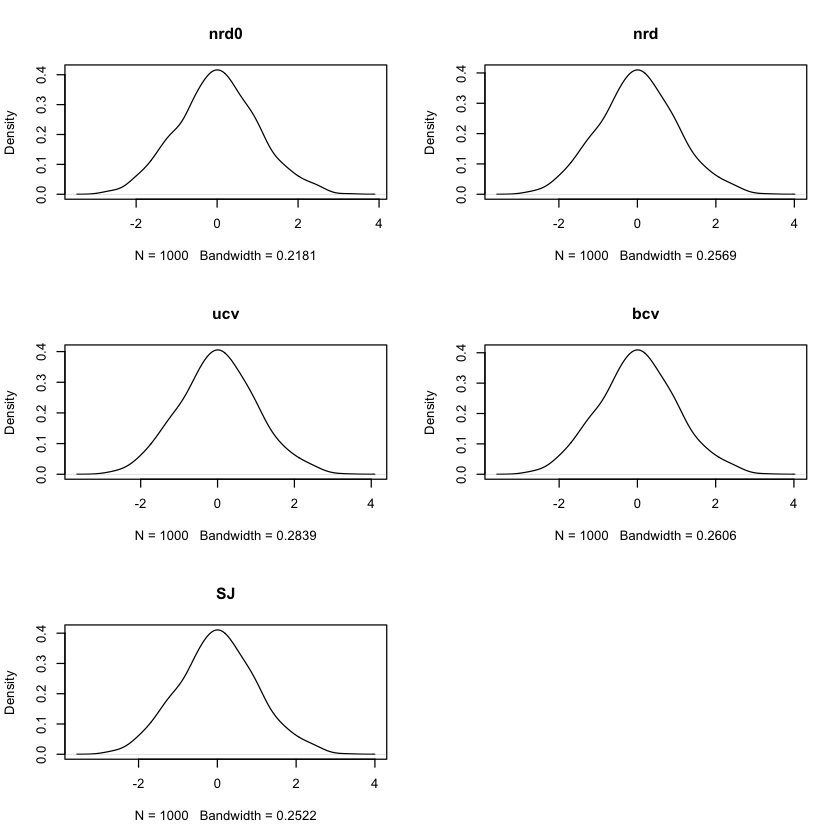

In [6]:
# 比较不同的带宽选择方法
kde1 <- density(data, kernel = "gaussian", bw = "nrd0", adjust = 1)
kde2 <- density(data, kernel = "gaussian", bw = "nrd", adjust = 1)
kde3 <- density(data, kernel = "gaussian", bw = "ucv", adjust = 1)
kde4 <- density(data, kernel = "gaussian", bw = "bcv", adjust = 1)
kde5 <- density(data, kernel = "gaussian", bw = "SJ", adjust = 1)

par(mfrow = c(3, 2))
plot(kde1, main = "nrd0")
plot(kde2, main = "nrd")
plot(kde3, main = "ucv")
plot(kde4, main = "bcv")
plot(kde5, main = "SJ")

In [11]:
# 使用MASS包中的带宽选择
library(MASS)
bw_ucv <- bw.ucv(data)
cat("bw:", bw_ucv)

Warning message in bw.ucv(data):
"minimum occurred at one end of the range"


bw: 0.2839154

# 多元核密度估计

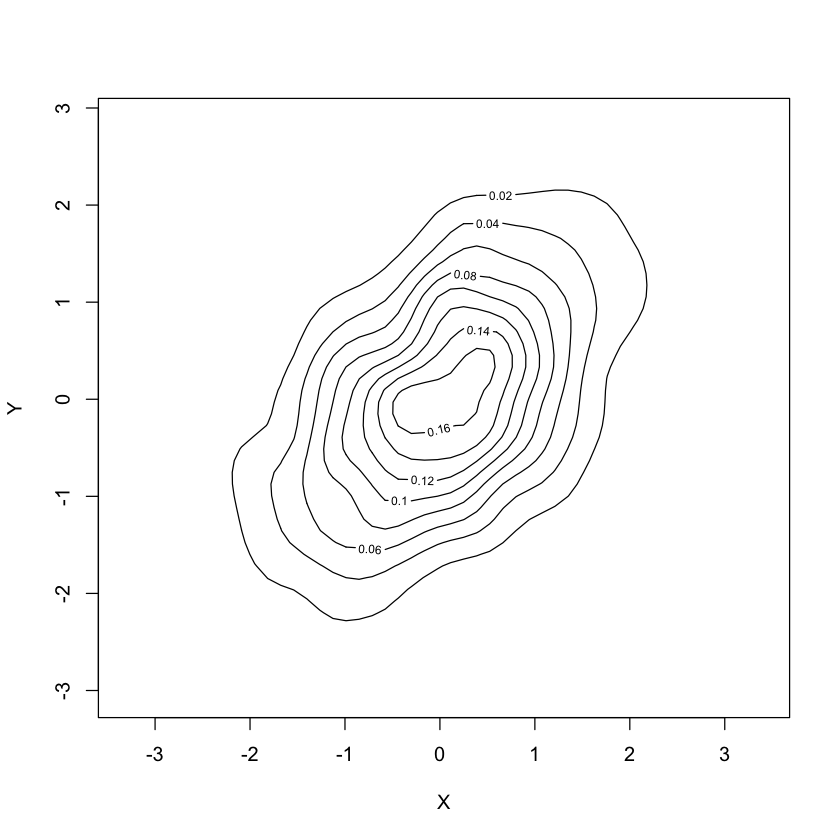

In [13]:
# 使用MASS包中的二维核密度估计
library(MASS)
data_2d <- mvrnorm(1000, mu = c(0,0), Sigma = matrix(c(1,0.5,0.5,1), ncol=2))

# 二维核密度估计
kde_2d <- kde2d(data_2d[,1], data_2d[,2], n = 50)

# 绘制等高线图
contour(kde_2d, xlab = "X", ylab = "Y")

# 非参数核回归

In [15]:
install.packages("locfit")


The downloaded binary packages are in
	/var/folders/fv/c0dh9y6s7638rh5fdr3lgcmr0000gn/T//Rtmpihs8sL/downloaded_packages


In [29]:
install.packages("np")

also installing the dependency 'cubature'





The downloaded binary packages are in
	/var/folders/fv/c0dh9y6s7638rh5fdr3lgcmr0000gn/T//Rtmpihs8sL/downloaded_packages


In [35]:
# 生成示例数据
set.seed(123)
data <- data.frame(
  x = rnorm(200),
  y = sin(rnorm(200)) + rnorm(200, sd = 0.3)
)

# 自动选择带宽（交叉验证）
model <- npreg(
  y ~ x,
  data = data,
  bwmethod = "cv.ls",    # 最小二乘交叉验证
  ckertype = "gaussian"   # 高斯核
)

# 查看带宽和模型摘要
summary(model)

                   
Regression Data: 200 training points, in 1 variable(s)
                      x
Bandwidth(s): 0.1662303

Kernel Regression Estimator: Local-Constant
Bandwidth Type: Fixed
Residual standard error: 0.6708666
R-squared: 0.1172569

Continuous Kernel Type: Second-Order Gaussian
No. Continuous Explanatory Vars.: 1



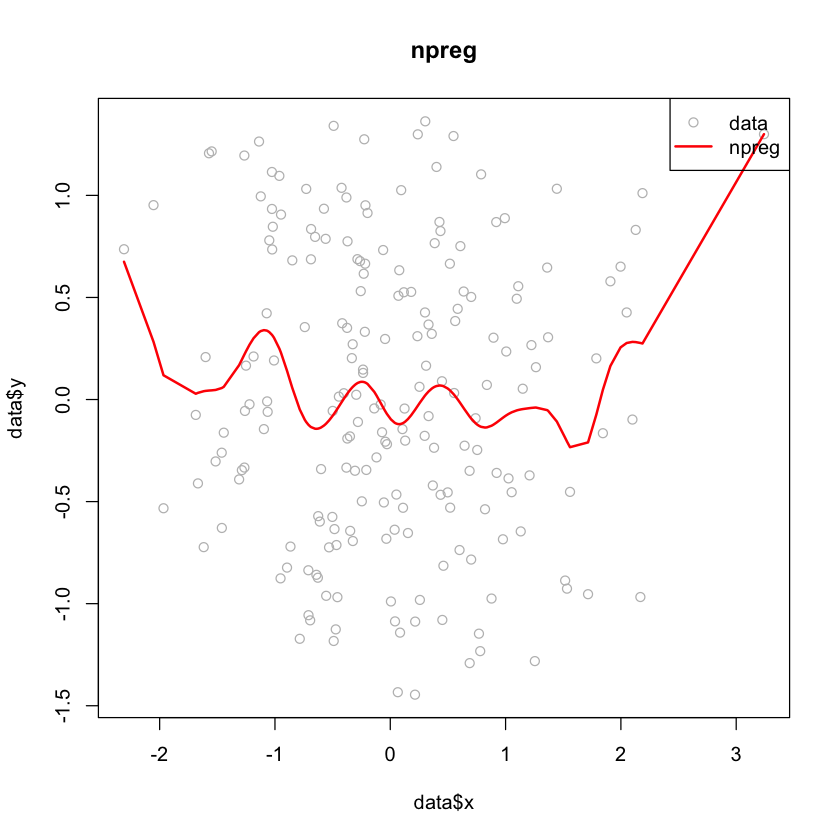

In [37]:
# 可视化拟合曲线
plot(data$x, data$y, col = "gray", main = "npreg")
lines(sort(data$x), predict(model, newdata = data.frame(x = sort(data$x))), 
      col = "red", lwd = 2)
legend("topright", legend = c("data", "npreg"), 
       col = c("gray", "red"), pch = c(1, NA), lwd = c(NA, 2))

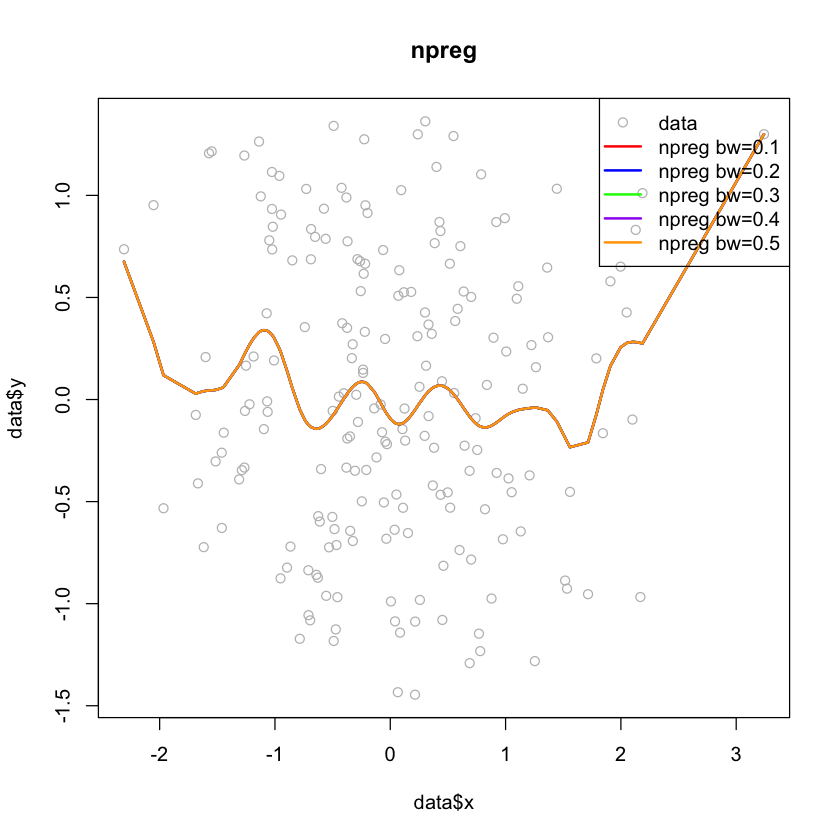

In [43]:
# 同时显示不同带宽的核回归结果
model1 <- npreg(y ~ x, data = data, bw = 0.01, ckertype = "gaussian")
model2 <- npreg(y ~ x, data = data, bw = 0.5, ckertype = "gaussian")
model3 <- npreg(y ~ x, data = data, bw = 1, ckertype = "gaussian")
model4 <- npreg(y ~ x, data = data, bw = 2, ckertype = "gaussian")
model5 <- npreg(y ~ x, data = data, bw = 10, ckertype = "gaussian")

plot(data$x, data$y, col = "gray", main = "npreg")
lines(sort(data$x), predict(model1, newdata = data.frame(x = sort(data$x))), 
      col = "red", lwd = 2)
lines(sort(data$x), predict(model2, newdata = data.frame(x = sort(data$x))),
      col = "blue", lwd = 2)
lines(sort(data$x), predict(model3, newdata = data.frame(x = sort(data$x))),
      col = "green", lwd = 2)
lines(sort(data$x), predict(model4, newdata = data.frame(x = sort(data$x))),
      col = "purple", lwd = 2)
lines(sort(data$x), predict(model5, newdata = data.frame(x = sort(data$x))),
      col = "orange", lwd = 2)

legend("topright", legend = c("data", "npreg bw=0.1", "npreg bw=0.2", "npreg bw=0.3", "npreg bw=0.4", "npreg bw=0.5"), 
       col = c("gray", "red", "blue", "green", "purple", "orange"), pch = c(1, NA, NA, NA, NA, NA), lwd = c(NA, 2, 2, 2, 2, 2))

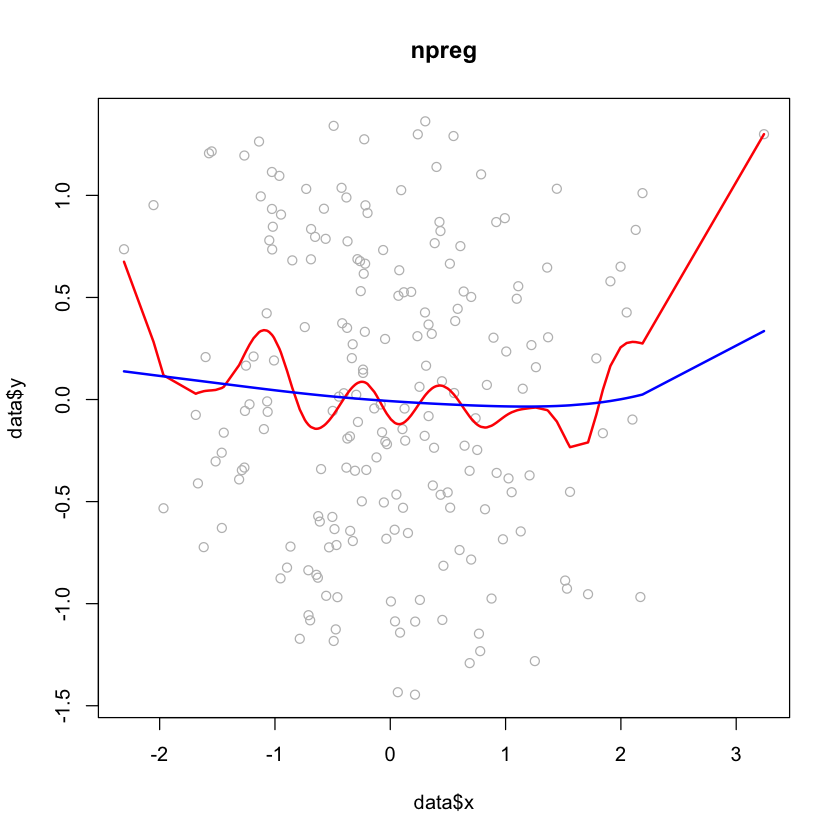

In [45]:
# 不同带宽选择方法
model1 <- npreg(y ~ x, data = data, bwmethod = "cv.ls", ckertype = "gaussian")
model2 <- npreg(y ~ x, data = data, bwmethod = "cv.aic", ckertype = "gaussian")

plot(data$x, data$y, col = "gray", main = "npreg")
lines(sort(data$x), predict(model1, newdata = data.frame(x = sort(data$x))), 
      col = "red", lwd = 2)
lines(sort(data$x), predict(model2, newdata = data.frame(x = sort(data$x))),
      col = "blue", lwd = 2)

Warning message in rbandwidth(bw = tbw$bw, regtype = tbw$regtype, bwmethod = tbw$method, :
"ignoring kernel order specified with uniform kernel type"


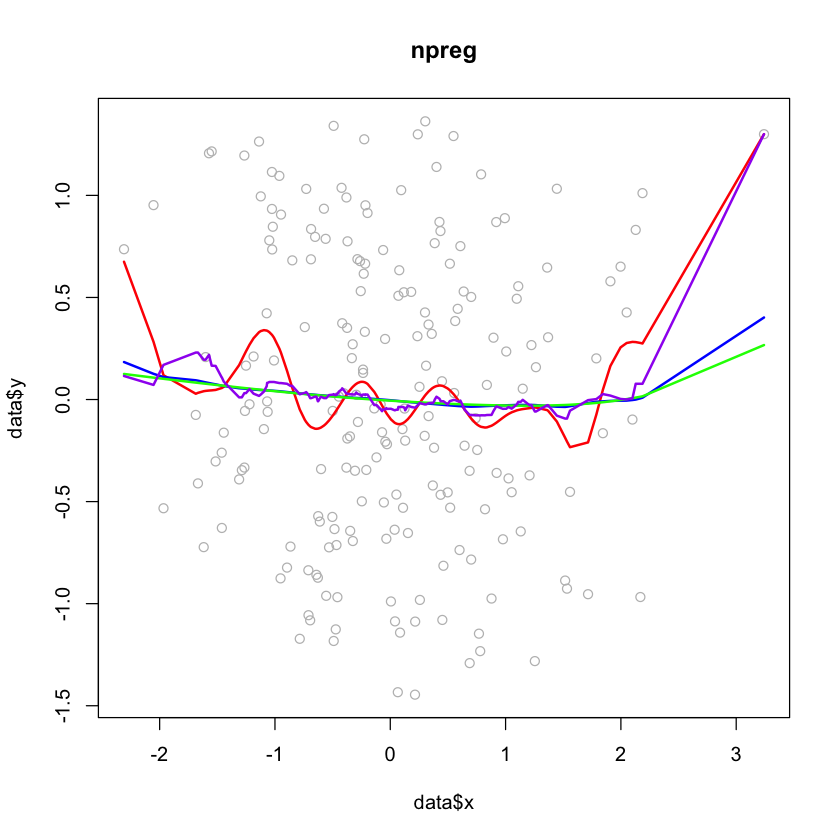

In [47]:
# 比较不同的核函数
model1 <- npreg(y ~ x, data = data, ckertype = "gaussian")
model2 <- npreg(y ~ x, data = data, ckertype = "epanechnikov")
model3 <- npreg(y ~ x, data = data, ckertype = "truncated gaussian")
model4 <- npreg(y ~ x, data = data, ckertype = "uniform")

plot(data$x, data$y, col = "gray", main = "npreg")
lines(sort(data$x), predict(model1, newdata = data.frame(x = sort(data$x))), 
      col = "red", lwd = 2)
lines(sort(data$x), predict(model2, newdata = data.frame(x = sort(data$x))),
      col = "blue", lwd = 2)
lines(sort(data$x), predict(model3, newdata = data.frame(x = sort(data$x))),
      col = "green", lwd = 2)
lines(sort(data$x), predict(model4, newdata = data.frame(x = sort(data$x))),
      col = "purple", lwd = 2)

# 多元核回归

In [48]:
# 多元核回归
data <- data.frame(
  x1 = rnorm(200),
  x2 = rnorm(200),
  y = sin(rnorm(200)) + rnorm(200, sd = 0.3)
)

model <- npreg(
  y ~ x1 + x2,
  data = data,
  bwmethod = "cv.ls",
  ckertype = "gaussian"
)

summary(model)

                   
Regression Data: 200 training points, in 2 variable(s)
                    x1      x2
Bandwidth(s): 2.569689 1006414

Kernel Regression Estimator: Local-Constant
Bandwidth Type: Fixed
Residual standard error: 0.7307921
R-squared: 0.00786327

Continuous Kernel Type: Second-Order Gaussian
No. Continuous Explanatory Vars.: 2



# K近邻回归

In [50]:
install.packages("FNN")


The downloaded binary packages are in
	/var/folders/fv/c0dh9y6s7638rh5fdr3lgcmr0000gn/T//Rtmpihs8sL/downloaded_packages


In [52]:
install.packages("caret")

also installing the dependencies 'SQUAREM', 'diagram', 'lava', 'prodlim', 'clock', 'gower', 'hardhat', 'ipred', 'sparsevctrs', 'ModelMetrics', 'pROC', 'recipes'





The downloaded binary packages are in
	/var/folders/fv/c0dh9y6s7638rh5fdr3lgcmr0000gn/T//Rtmpihs8sL/downloaded_packages


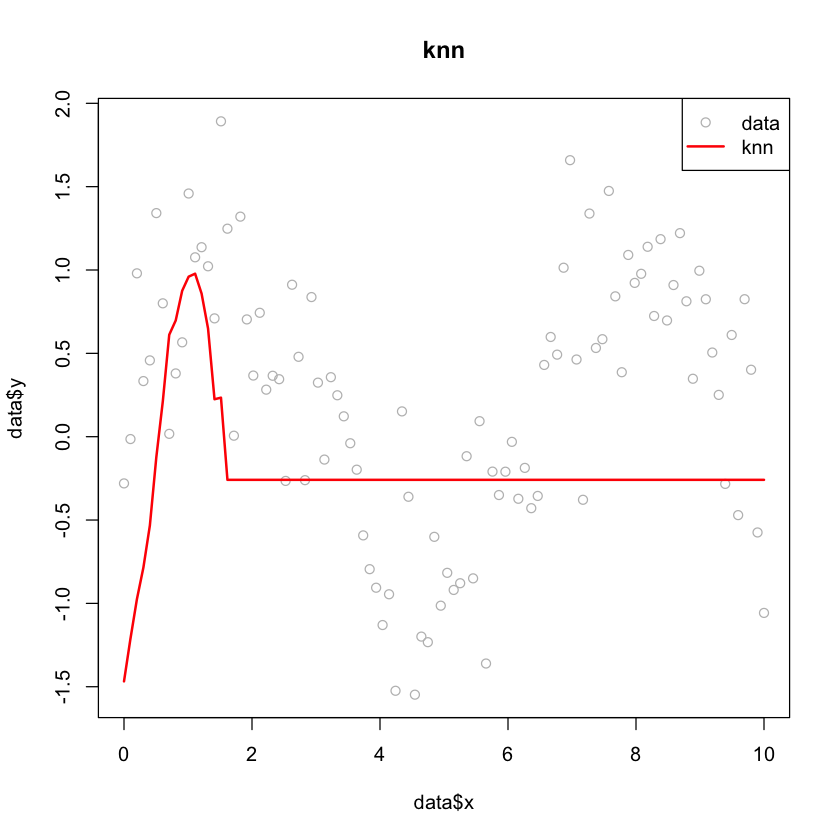

In [58]:
# 加载包
library(FNN)
library(caret)

# 生成数据
set.seed(123)
x <- seq(0, 10, length.out = 100)
y <- sin(x) + rnorm(100, sd = 0.5)
data <- data.frame(x, y)

# 标准化
data_scaled <- as.data.frame(scale(data))

# 自动调参（caret包）
ctrl <- trainControl(method = "cv", number = 10)
knn_caret <- train(
  y ~ x,
  data = data_scaled,
  method = "knn",
  trControl = ctrl,
  tuneGrid = data.frame(k = seq(1, 20, by = 2))
)

# 可视化散点与结果
plot(data$x, data$y, col = "gray", main = "knn")
lines(sort(data$x), predict(knn_caret, newdata = data.frame(x = sort(data$x))), 
      col = "red", lwd = 2)
legend("topright", legend = c("data", "knn"), 
       col = c("gray", "red"), pch = c(1, NA), lwd = c(NA, 2))

# 局部多项式回归

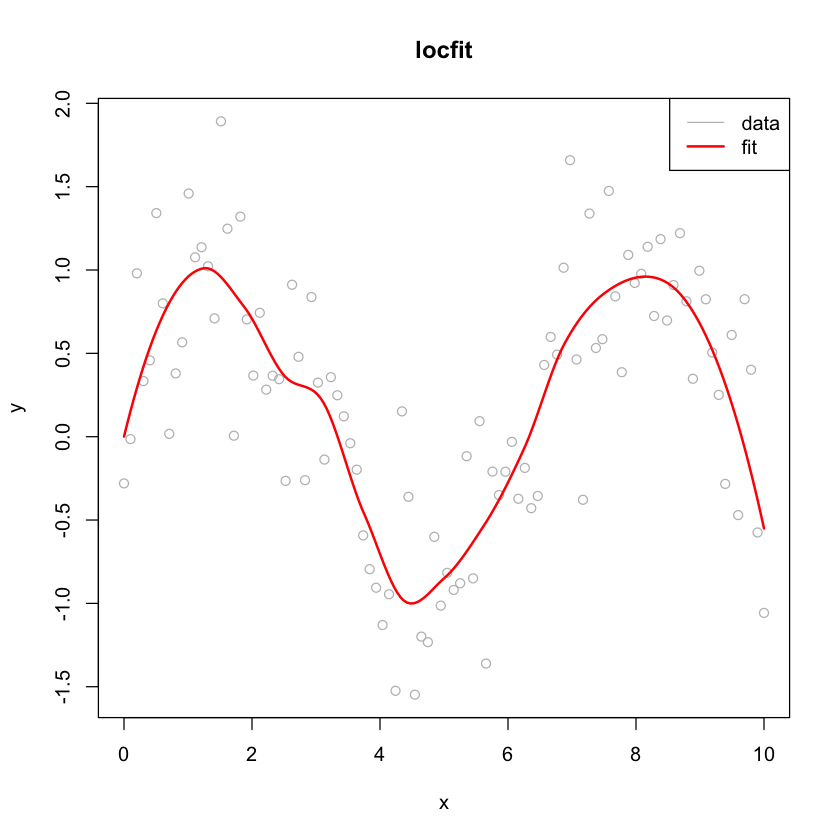

In [61]:
# 生成示例数据
set.seed(123)
x <- seq(0, 10, length.out = 100)
y <- sin(x) + rnorm(100, sd = 0.5)
data <- data.frame(x, y)

# 拟合局部线性回归（多项式次数=2）
model <- locfit(y ~ lp(x, nn = 0.3, deg = 2), data = data)

# 预测新数据点
new_x <- data.frame(x = seq(0, 10, length.out = 200))
pred_y <- predict(model, newdata = new_x)

# 可视化
plot(x, y, col = "gray", main = "locfit")
lines(new_x$x, pred_y, col = "red", lwd = 2)
legend("topright", legend = c("data", "fit"), 
       col = c("gray", "red"), lwd = c(1, 2))

# Lowess回归

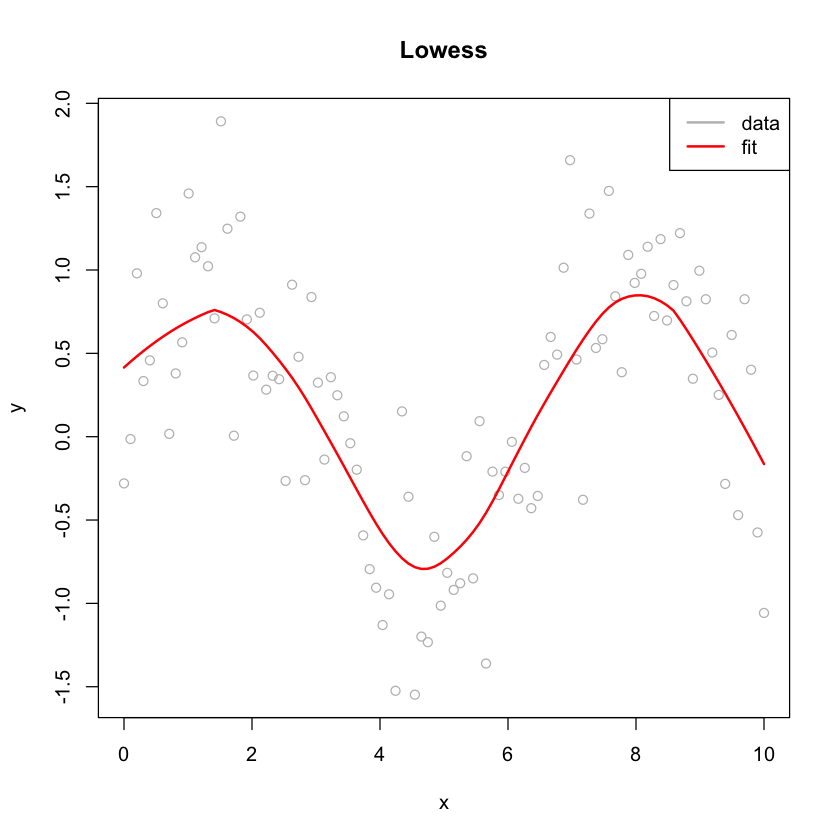

In [63]:
# 生成示例数据
set.seed(123)
x <- seq(0, 10, length.out = 100)
y <- sin(x) + rnorm(100, sd = 0.5)
data <- data.frame(x, y)

# 执行Lowess回归
lowess_fit <- lowess(x, y, f = 0.3, iter = 3)  # f为span参数，iter为迭代次数

# 可视化
plot(x, y, col = "gray", main = "Lowess")
lines(lowess_fit, col = "red", lwd = 2)
legend("topright", legend = c("data", "fit"), 
       col = c("gray", "red"), lwd = 2)

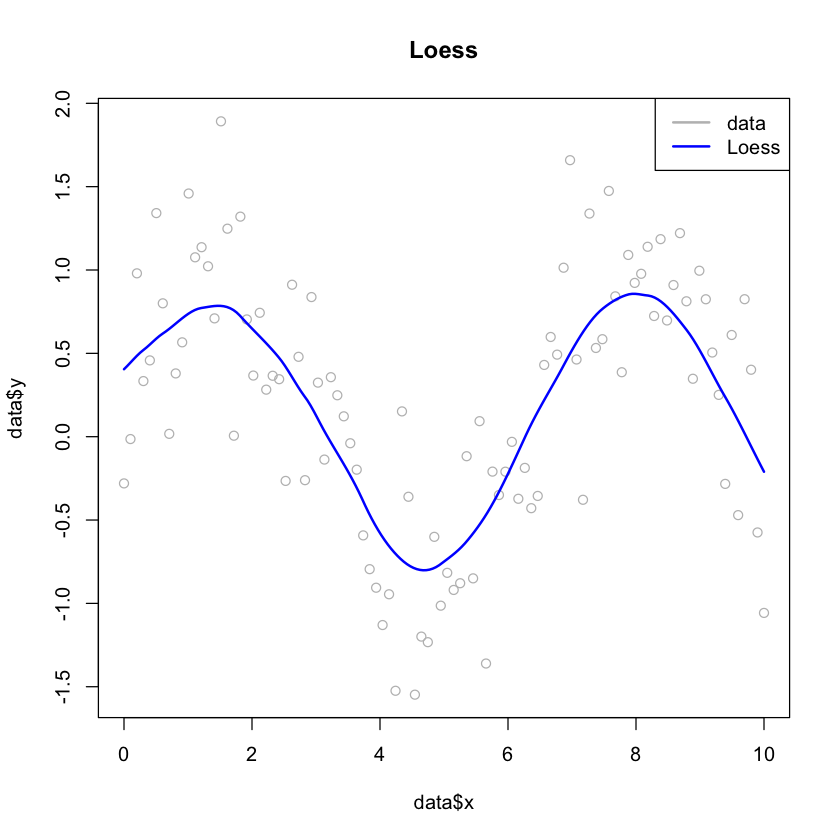

In [65]:
# 生成数据（同上）
data <- data.frame(x, y)

# 拟合Loess模型
loess_model <- loess(y ~ x, data = data, span = 0.3, degree = 1)

# 预测新数据
new_x <- data.frame(x = seq(0, 10, length.out = 200))
pred_y <- predict(loess_model, newdata = new_x)

# 可视化
plot(data$x, data$y, col = "gray", main = "Loess")
lines(new_x$x, pred_y, col = "blue", lwd = 2)
legend("topright", legend = c("data", "Loess"), 
       col = c("gray", "blue"), lwd = 2)